# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [257]:
import sqlite3

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [258]:
# TODO: Set up a connection the "Market.db" database
#conn = sqlite3.connect("Market.db")
conn = sqlite3.connect("db/Market.db")

# TODO: Set up the cursor
cursor = conn.cursor()


### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [259]:
#Products Table 
cursor.execute("""
    SELECT *
    FROM Products;
""")

rows = cursor.fetchall()
#print(rows)
for r in rows:
    print (r)

(1, 'Chais', 1, 1, '10 boxes x 20 bags', 18)
(2, 'Chang', 1, 1, '24 - 12 oz bottles', 19)
(3, 'Aniseed Syrup', 1, 2, '12 - 550 ml bottles', 10)
(4, "Chef Anton's Cajun Seasoning", 2, 2, '48 - 6 oz jars', 22)
(5, "Chef Anton's Gumbo Mix", 2, 2, '36 boxes', 21.35)
(6, "Grandma's Boysenberry Spread", 3, 2, '12 - 8 oz jars', 25)
(7, "Uncle Bob's Organic Dried Pears", 3, 7, '12 - 1 lb pkgs.', 30)
(8, 'Northwoods Cranberry Sauce', 3, 2, '12 - 12 oz jars', 40)
(9, 'Mishi Kobe Niku', 4, 6, '18 - 500 g pkgs.', 97)
(10, 'Ikura', 4, 8, '12 - 200 ml jars', 31)
(11, 'Queso Cabrales', 5, 4, '1 kg pkg.', 21)
(12, 'Queso Manchego La Pastora', 5, 4, '10 - 500 g pkgs.', 38)
(13, 'Konbu', 6, 8, '2 kg box', 6)
(14, 'Tofu', 6, 7, '40 - 100 g pkgs.', 23.25)
(15, 'Genen Shouyu', 6, 2, '24 - 250 ml bottles', 15.5)
(16, 'Pavlova', 7, 3, '32 - 500 g boxes', 17.45)
(17, 'Alice Mutton', 7, 6, '20 - 1 kg tins', 39)
(18, 'Carnarvon Tigers', 7, 8, '16 kg pkg.', 62.5)
(19, 'Teatime Chocolate Biscuits', 8, 3, '10 boxe

In [260]:
#Products dataframe
columns = [desc[0] for desc in cursor.description]
products_df = pd.DataFrame(rows, columns=columns)
products_df


,ProductID,ProductName,SupplierID,CategoryID,Unit,Price
0,1,Chais,1,1,10 boxes x 20 bags,18.00
1,2,Chang,1,1,24 - 12 oz bottles,19.00
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35
...,...,...,...,...,...,...
72,73,Röd Kaviar,17,8,24 - 150 g jars,15.00
73,74,Longlife Tofu,4,7,5 kg pkg.,10.00
74,75,Rhönbräu Klosterbier,12,1,24 - 0.5 l bottles,7.75
75,76,Lakkalikööri,23,1,500 ml,18.00


In [261]:
# TODO: Write a SQL query which will answer the question above.
#products_df[products_df["Price"] < 10.00] #pandas methods

cursor.execute("""
SELECT COUNT(Price)
FROM Products
WHERE Price < 10;
""")

rows = cursor.fetchall()
print(rows)



[(11,)]


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [304]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT Country,  COUNT (SupplierID)
    FROM Suppliers
    GROUP BY Country
    ORDER BY COUNT (Country) DESC
""")

# TODO: Fetch your list of tuples and print it out
rows_sup = cursor.fetchall()
columns_sup = [desc[0] for desc in cursor.description]
print(rows_sup)

[('USA', 4), ('Germany', 3), ('France', 3), ('UK', 2), ('Sweden', 2), ('Japan', 2), ('Italy', 2), ('Canada', 2), ('Australia', 2), ('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1), ('Finland', 1), ('Denmark', 1), ('Brazil', 1)]


In [305]:
# TODO: Convert your list of tuples to a dataframe
country_count_df = pd.DataFrame(rows_sup, columns = columns_sup)
country_count_df

,Country,COUNT (SupplierID)
0,USA,4
1,Germany,3
2,France,3
3,UK,2
4,Sweden,2
5,Japan,2
6,Italy,2
7,Canada,2
8,Australia,2
9,Spain,1


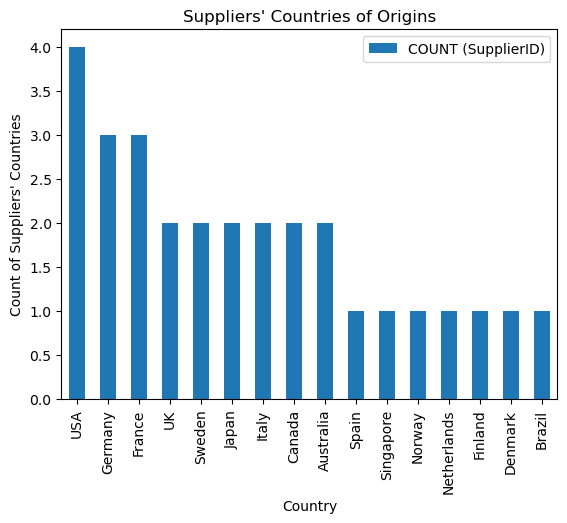

In [306]:
# TODO: Generate a visualization on this dataframe
#bar graph because there are categories

country_count_df.plot.bar(x= "Country")
plt.title("Suppliers' Countries of Origins")
plt.xlabel('Country')
plt.ylabel("Count of Suppliers' Countries")
plt.show()

### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [299]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT Country, COUNT (CustomerID)
    FROM Customers
    GROUP BY Country
    ORDER BY COUNT (Country) DESC       
""")

# TODO: Fetch your list of tuples and print it out
rows_cus = cursor.fetchall()
columns_cus = [desc[0] for desc in cursor.description]
print(rows_cus)

[('USA', 13), ('Germany', 11), ('France', 11), ('Brazil', 9), ('UK', 7), ('Spain', 5), ('Mexico', 5), ('Venezuela', 4), ('Italy', 3), ('Canada', 3), ('Argentina', 3), ('Switzerland', 2), ('Sweden', 2), ('Portugal', 2), ('Finland', 2), ('Denmark', 2), ('Belgium', 2), ('Austria', 2), ('Poland', 1), ('Norway', 1), ('Ireland', 1)]


In [300]:
# TODO: Convert your list of tuples to a dataframe
cust_country_df = pd.DataFrame(rows_cus, columns= columns_cus)
cust_country_df


,Country,COUNT (CustomerID)
0,USA,13
1,Germany,11
2,France,11
3,Brazil,9
4,UK,7
5,Spain,5
6,Mexico,5
7,Venezuela,4
8,Italy,3
9,Canada,3


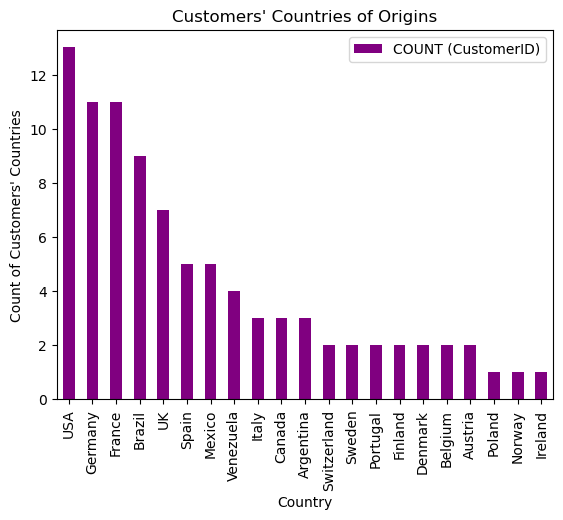

In [315]:
# TODO: Generate a visualization on this dataframe

cust_country_df.plot.bar(x= "Country", color= "purple")
plt.title("Customers' Countries of Origins")
plt.xlabel('Country')
plt.ylabel("Count of Customers' Countries")
plt.show()

### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [331]:
# TODO: Write a SQL query which will answer the question above.
#This is with the groupby

#Joining OrderDetails and Products through primary key : ProductId

cursor.execute("""
    SELECT od.ProductId, p.ProductName, SUM (od.Quantity) "Quantity Total"
    FROM Products AS p
    Inner JOIN OrderDetails AS od
    ON p.ProductId = od.ProductId
    GROUP BY p.ProductName
    ORDER BY "Quantity Total" ASC
    LIMIT 20;                             
""")

# TODO: Fetch your list of tuples and print it out
rows_quant = cursor.fetchall()
columns_quant = [desc[0] for desc in cursor.description]
print(rows_quant)

[(67, 'Laughing Lumberjack Lager', 5), (45, 'Røgede sild', 15), (22, "Gustaf's Knäckebröd", 18), (9, 'Mishi Kobe Niku', 20), (15, 'Genen Shouyu', 25), (7, "Uncle Bob's Organic Dried Pears", 25), (12, 'Queso Manchego La Pastora', 27), (6, "Grandma's Boysenberry Spread", 36), (37, 'Gravad lax', 39), (73, 'Röd Kaviar', 45), (52, 'Filo Mix', 48), (32, 'Mascarpone Fabioli', 52), (48, 'Chocolade', 70), (50, 'Valkoinen suklaa', 70), (25, 'NuNuCa Nuß-Nougat-Creme', 71), (42, 'Singaporean Hokkien Fried Mee', 77), (3, 'Aniseed Syrup', 80), (10, 'Ikura', 85), (66, 'Louisiana Hot Spiced Okra', 90), (27, 'Schoggi Schokolade', 90)]


In [332]:
# TODO: Convert your list of tuples to a dataframe
prod_quant_df = pd.DataFrame(rows_quant, columns= columns_quant)
prod_quant_df


,ProductID,ProductName,Quantity Total
0,67,Laughing Lumberjack Lager,5
1,45,Røgede sild,15
2,22,Gustaf's Knäckebröd,18
3,9,Mishi Kobe Niku,20
4,15,Genen Shouyu,25
5,7,Uncle Bob's Organic Dried Pears,25
6,12,Queso Manchego La Pastora,27
7,6,Grandma's Boysenberry Spread,36
8,37,Gravad lax,39
9,73,Röd Kaviar,45


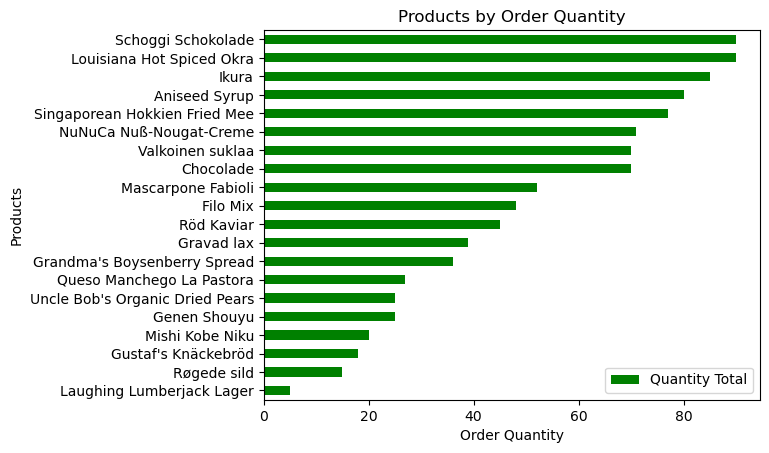

In [333]:
# TODO: Generate a visualization on this dataframe
prod_quant_df.plot.barh(x= "ProductName", y= "Quantity Total", color = "green")
plt.title("Products by Order Quantity")
plt.xlabel("Order Quantity")
plt.ylabel('Products')
plt.show()


### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [352]:
# TODO: Write a SQL query which will answer the question above.
#Joining OrderDetails and Products through primary key : ProductId
cursor.execute("""
    SELECT od.ProductId, p.ProductName, od.Quantity, SUM (od.Quantity) "Quantity Total", p.Price, SUM(od.Quantity * p.Price) AS "Total Revenue"
    FROM Products AS p
    Inner JOIN OrderDetails AS od
    ON p.ProductId = od.ProductId
    GROUP BY P.ProductName
    ORDER BY "Total Revenue" 
    LIMIT 20
    ;                             
""")
rows_revenue = cursor.fetchall()
columns_revenue = [desc[0] for desc in cursor.description]
print(rows_revenue)

[(67, 'Laughing Lumberjack Lager', 5, 5, 14, 70), (45, 'Røgede sild', 15, 15, 9.5, 142.5), (52, 'Filo Mix', 20, 48, 7, 336), (22, "Gustaf's Knäckebröd", 6, 18, 21, 378), (15, 'Genen Shouyu', 20, 25, 15.5, 387.5), (13, 'Konbu', 10, 92, 6, 552), (73, 'Röd Kaviar', 25, 45, 15, 675), (24, 'Guaraná Fantástica', 15, 158, 4.5, 711.0), (7, "Uncle Bob's Organic Dried Pears", 15, 25, 30, 750), (33, 'Geitost', 25, 316, 2.5, 790.0), (3, 'Aniseed Syrup', 30, 80, 10, 800), (48, 'Chocolade', 70, 70, 12.75, 892.5), (6, "Grandma's Boysenberry Spread", 30, 36, 25, 900), (47, 'Zaanse koeken', 16, 101, 9.5, 959.5), (25, 'NuNuCa Nuß-Nougat-Creme', 4, 71, 14, 994), (37, 'Gravad lax', 1, 39, 26, 1014), (12, 'Queso Manchego La Pastora', 12, 27, 38, 1026), (42, 'Singaporean Hokkien Fried Mee', 10, 77, 14, 1078), (75, 'Rhönbräu Klosterbier', 30, 144, 7.75, 1116.0), (50, 'Valkoinen suklaa', 15, 70, 16.25, 1137.5)]


In [353]:
# TODO: Convert your list of tuples to a dataframe

total_rev_df = pd.DataFrame(rows_revenue, columns= columns_revenue)
total_rev_df



,ProductID,ProductName,Quantity,Quantity Total,Price,Total Revenue
0,67,Laughing Lumberjack Lager,5,5,14.00,70.0
1,45,Røgede sild,15,15,9.50,142.5
2,52,Filo Mix,20,48,7.00,336.0
3,22,Gustaf's Knäckebröd,6,18,21.00,378.0
4,15,Genen Shouyu,20,25,15.50,387.5
5,13,Konbu,10,92,6.00,552.0
6,73,Röd Kaviar,25,45,15.00,675.0
7,24,Guaraná Fantástica,15,158,4.50,711.0
8,7,Uncle Bob's Organic Dried Pears,15,25,30.00,750.0
9,33,Geitost,25,316,2.50,790.0


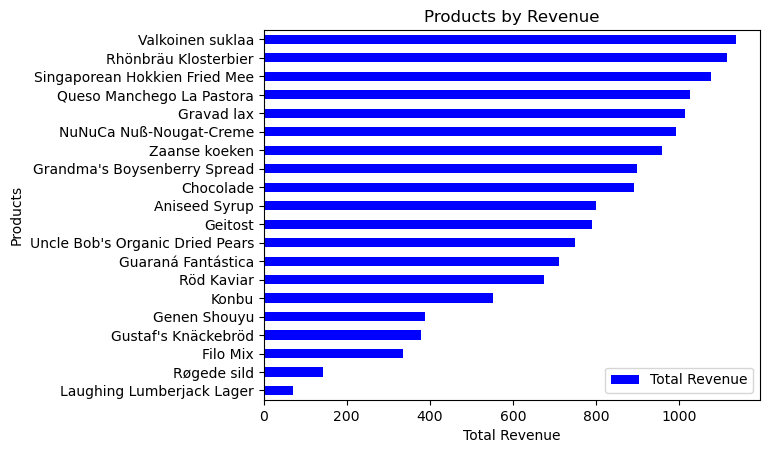

In [348]:
# TODO: Generate a visualization on this dataframe

total_rev_df.plot.barh(x= "ProductName", y= "Total Revenue", color = "blue")
plt.title("Products by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel('Products')
plt.show()

### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [274]:
# TODO: Write a SQL query which will answer the question above.
#Not finished. Stuck on how to get the orders. Is it count of quantity?

#Have to join Customers and Orders 
#Join on CustomerID


cursor.execute("""
    SELECT c.Country, COUNT(o.OrderID) AS Order_Count
    FROM Customers AS c
    Inner JOIN Orders as o
    ON c.CustomerID = o.CustomerID
    GROUP BY c.Country
    ORDER BY Order_Count DESC
    LIMIT 20
    ;                

""")

# TODO: Fetch your list of tuples and print it out
rows_orders = cursor.fetchall()
columns_orders = [desc[0] for desc in cursor.description]
print(rows_orders)

[('USA', 29), ('Germany', 25), ('Brazil', 19), ('France', 18), ('Austria', 13), ('UK', 12), ('Venezuela', 9), ('Mexico', 9), ('Canada', 9), ('Finland', 8), ('Sweden', 7), ('Spain', 7), ('Italy', 7), ('Ireland', 6), ('Portugal', 5), ('Switzerland', 4), ('Denmark', 4), ('Belgium', 2), ('Poland', 1), ('Norway', 1)]


In [275]:
# TODO: Convert your list of tuples to a dataframe
orders_country_df = pd.DataFrame(rows_orders, columns= columns_orders)
orders_country_df


,Country,Order_Count
0,USA,29
1,Germany,25
2,Brazil,19
3,France,18
4,Austria,13
5,UK,12
6,Venezuela,9
7,Mexico,9
8,Canada,9
9,Finland,8


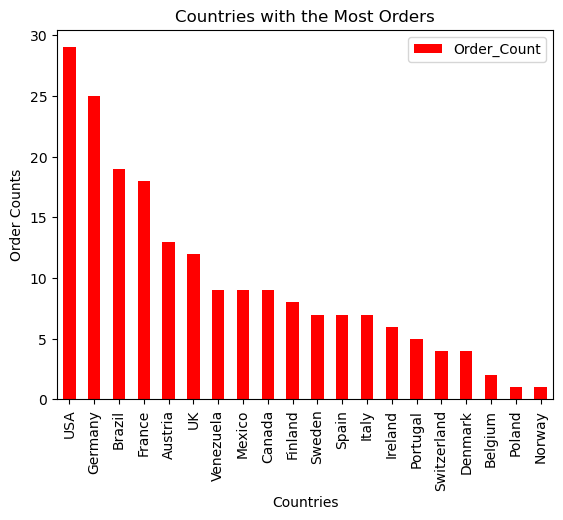

In [360]:
# TODO: Generate a visualization on this dataframe

orders_country_df.plot.bar(x= "Country", y="Order_Count", color = "red")
plt.title("Countries with the Most Orders")
plt.xlabel("Countries")
plt.ylabel('Order Counts')
plt.show()

### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
#Joining Customers and Orders

cursor.execute("""
SELECT c.Country, COUNT(c.CustomerID) AS CustomersNoOrders, O.OrderID
FROM Customers AS c
LEFT JOIN Orders as o
ON o.CustomerID = c.CustomerID
WHERE O.OrderID IS NULL
GROUP BY c.Country 
ORDER BY CustomersNoOrders
;                

""")

# TODO: Fetch your list of tuples and print it out
rows_no_orders = cursor.fetchall()
columns_no_orders = [desc[0] for desc in cursor.description]
print(rows_no_orders)

[('Belgium', 1, None), ('Canada', 1, None), ('Spain', 1, None), ('UK', 1, None), ('Argentina', 2, None), ('Germany', 2, None), ('France', 4, None), ('USA', 5, None)]


In [278]:
# TODO: Convert your list of tuples to a dataframe
no_orders_country_df = pd.DataFrame(rows_no_orders, columns= columns_no_orders)
no_orders_country_df



,Country,CustomersNoOrders,OrderID
0,Belgium,1,None
1,Canada,1,None
2,Spain,1,None
3,UK,1,None
4,Argentina,2,None
5,Germany,2,None
6,France,4,None
7,USA,5,None


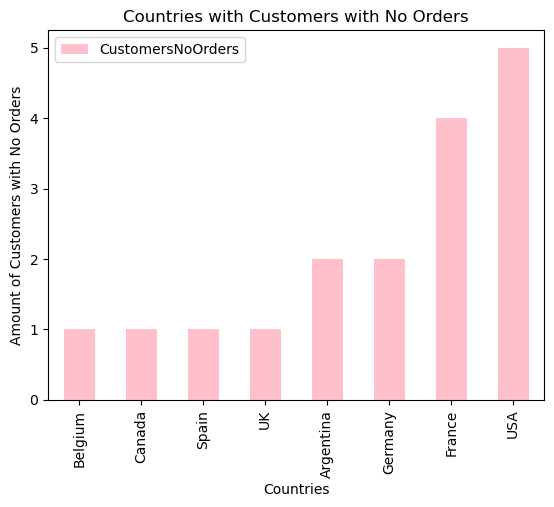

In [279]:
# TODO: Generate a visualization on this dataframe

no_orders_country_df.plot.bar(x= "Country", y="CustomersNoOrders", color = "pink")
plt.title("Countries with Customers with No Orders")
plt.ylabel('Amount of Customers with No Orders')
plt.xlabel('Countries')
plt.show()

### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [280]:
# TODO: Write a SQL query which will answer the question above.
#Joining OrderDetails and Products (Primary key: ProductID)
#Joining Products and Suppliers (Primary key: SupplierID)

#This joins Products and Supplier details to get the inner query
cursor.execute("""
SELECT s.SupplierID, s.SupplierName, p.ProductID
FROM Suppliers as s
INNER JOIN Products as p
ON s.SupplierID = p.SupplierID
;                
""") #as sp


# TODO: Fetch your list of tuples and print it out
prod_sup_rows = cursor.fetchall()
columns_prod_sup = [desc[0] for desc in cursor.description]
print(prod_sup_rows)

[(1, 'Exotic Liquid', 1), (1, 'Exotic Liquid', 2), (1, 'Exotic Liquid', 3), (2, 'New Orleans Cajun Delights', 4), (2, 'New Orleans Cajun Delights', 5), (3, "Grandma Kelly's Homestead", 6), (3, "Grandma Kelly's Homestead", 7), (3, "Grandma Kelly's Homestead", 8), (4, 'Tokyo Traders', 9), (4, 'Tokyo Traders', 10), (5, "Cooperativa de Quesos 'Las Cabras'", 11), (5, "Cooperativa de Quesos 'Las Cabras'", 12), (6, "Mayumi's", 13), (6, "Mayumi's", 14), (6, "Mayumi's", 15), (7, 'Pavlova, Ltd.', 16), (7, 'Pavlova, Ltd.', 17), (7, 'Pavlova, Ltd.', 18), (8, 'Specialty Biscuits, Ltd.', 19), (8, 'Specialty Biscuits, Ltd.', 20), (8, 'Specialty Biscuits, Ltd.', 21), (9, 'PB Knäckebröd AB', 22), (9, 'PB Knäckebröd AB', 23), (10, 'Refrescos Americanas LTDA', 24), (11, 'Heli Süßwaren GmbH & Co. KG', 25), (11, 'Heli Süßwaren GmbH & Co. KG', 26), (11, 'Heli Süßwaren GmbH & Co. KG', 27), (12, 'Plutzer Lebensmittelgroßmärkte AG', 28), (12, 'Plutzer Lebensmittelgroßmärkte AG', 29), (13, 'Nord-Ost-Fisch Hande

In [281]:
#Convert your list of tuples to a dataframe
prod_sup_df = pd.DataFrame(prod_sup_rows, columns= columns_prod_sup)
prod_sup_df

,SupplierID,SupplierName,ProductID
0,1,Exotic Liquid,1
1,1,Exotic Liquid,2
2,1,Exotic Liquid,3
3,2,New Orleans Cajun Delights,4
4,2,New Orleans Cajun Delights,5
...,...,...,...
72,17,Svensk Sjöföda AB,73
73,4,Tokyo Traders,74
74,12,Plutzer Lebensmittelgroßmärkte AG,75
75,23,Karkki Oy,76


In [282]:
#Joining OrderDetails and Products (Primary key: ProductID)

cursor.execute("""
SELECT od.ProductId, p.ProductName, COUNT(od.OrderID)
FROM Products AS p
Inner JOIN OrderDetails AS od
ON p.ProductId = od.ProductId
;                
""")

In [283]:
#This joins the 3 tables w/o the aggregate methods
cursor.execute("""
SELECT sp.ProductID, sp.SupplierID, sp.SupplierName, od.OrderID
FROM 
    (SELECT s.SupplierID, s.SupplierName, p.ProductID
    FROM Suppliers as s
    INNER JOIN Products as p
    ON s.SupplierID = p.SupplierID) AS sp
INNER JOIN OrderDetails AS od 
ON sp.ProductId = od.ProductId;                
               
""")

prod_sup_od_rows = cursor.fetchall()
columns_prod_sup_od = [desc[0] for desc in cursor.description]
print(prod_sup_od_rows)

[(11, 5, "Cooperativa de Quesos 'Las Cabras'", 10248), (42, 20, 'Leka Trading', 10248), (72, 14, 'Formaggi Fortini s.r.l.', 10248), (14, 6, "Mayumi's", 10249), (51, 24, "G'day, Mate", 10249), (41, 19, 'New England Seafood Cannery', 10250), (51, 24, "G'day, Mate", 10250), (65, 2, 'New Orleans Cajun Delights', 10250), (22, 9, 'PB Knäckebröd AB', 10251), (57, 26, 'Pasta Buttini s.r.l.', 10251), (65, 2, 'New Orleans Cajun Delights', 10251), (20, 8, 'Specialty Biscuits, Ltd.', 10252), (33, 15, 'Norske Meierier', 10252), (60, 28, 'Gai pâturage', 10252), (31, 14, 'Formaggi Fortini s.r.l.', 10253), (39, 18, 'Aux joyeux ecclésiastiques', 10253), (49, 23, 'Karkki Oy', 10253), (24, 10, 'Refrescos Americanas LTDA', 10254), (55, 25, 'Ma Maison', 10254), (74, 4, 'Tokyo Traders', 10254), (2, 1, 'Exotic Liquid', 10255), (16, 7, 'Pavlova, Ltd.', 10255), (36, 17, 'Svensk Sjöföda AB', 10255), (59, 28, 'Gai pâturage', 10255), (53, 24, "G'day, Mate", 10256), (77, 12, 'Plutzer Lebensmittelgroßmärkte AG', 10

In [284]:
pso_df = pd.DataFrame(prod_sup_od_rows, columns= columns_prod_sup_od)
pso_df

,ProductID,SupplierID,SupplierName,OrderID
0,11,5,Cooperativa de Quesos 'Las Cabras',10248
1,42,20,Leka Trading,10248
2,72,14,Formaggi Fortini s.r.l.,10248
3,14,6,Mayumi's,10249
4,51,24,"G'day, Mate",10249
...,...,...,...,...
513,11,5,Cooperativa de Quesos 'Las Cabras',10442
514,54,25,Ma Maison,10442
515,66,2,New Orleans Cajun Delights,10442
516,11,5,Cooperativa de Quesos 'Las Cabras',10443


In [285]:
#This query does the aggregate functions to answering the question: most popular suppliers according to order count


cursor.execute("""
SELECT sp.ProductID, sp.SupplierID, sp.SupplierName, COUNT(DISTINCT od.OrderID) AS OrderCount
FROM 
    (SELECT s.SupplierID, s.SupplierName, p.ProductID
    FROM Suppliers as s
    INNER JOIN Products as p
    ON s.SupplierID = p.SupplierID) AS sp
INNER JOIN OrderDetails AS od 
ON sp.ProductId = od.ProductId
GROUP BY
    sp.SupplierID,
    sp.SupplierName
ORDER BY
    OrderCount DESC;                
""")
pso_rows = cursor.fetchall()
columns_pso = [desc[0] for desc in cursor.description]
print(pso_rows)

[(16, 7, 'Pavlova, Ltd.', 37), (77, 12, 'Plutzer Lebensmittelgroßmärkte AG', 37), (20, 8, 'Specialty Biscuits, Ltd.', 33), (33, 15, 'Norske Meierier', 30), (72, 14, 'Formaggi Fortini s.r.l.', 27), (60, 28, 'Gai pâturage', 26), (2, 1, 'Exotic Liquid', 21), (65, 2, 'New Orleans Cajun Delights', 20), (57, 26, 'Pasta Buttini s.r.l.', 20), (49, 23, 'Karkki Oy', 19), (55, 25, 'Ma Maison', 19), (51, 24, "G'day, Mate", 18), (41, 19, 'New England Seafood Cannery', 17), (14, 6, "Mayumi's", 16), (35, 16, 'Bigfoot Breweries', 16), (42, 20, 'Leka Trading', 16), (39, 18, 'Aux joyeux ecclésiastiques', 15), (62, 29, "Forêts d'érables", 15), (27, 11, 'Heli Süßwaren GmbH & Co. KG', 14), (36, 17, 'Svensk Sjöföda AB', 13), (74, 4, 'Tokyo Traders', 12), (11, 5, "Cooperativa de Quesos 'Las Cabras'", 11), (24, 10, 'Refrescos Americanas LTDA', 11), (30, 13, 'Nord-Ost-Fisch Handelsgesellschaft mbH', 8), (46, 21, 'Lyngbysild', 8), (7, 3, "Grandma Kelly's Homestead", 6), (22, 9, 'PB Knäckebröd AB', 6), (47, 22, 

In [286]:
# TODO: Convert your list of tuples to a dataframe
pop_sup_df = pd.DataFrame(pso_rows, columns= columns_pso)
pop_sup_df



,ProductID,SupplierID,SupplierName,OrderCount
0,16,7,"Pavlova, Ltd.",37
1,77,12,Plutzer Lebensmittelgroßmärkte AG,37
2,20,8,"Specialty Biscuits, Ltd.",33
3,33,15,Norske Meierier,30
4,72,14,Formaggi Fortini s.r.l.,27
5,60,28,Gai pâturage,26
6,2,1,Exotic Liquid,21
7,65,2,New Orleans Cajun Delights,20
8,57,26,Pasta Buttini s.r.l.,20
9,49,23,Karkki Oy,19


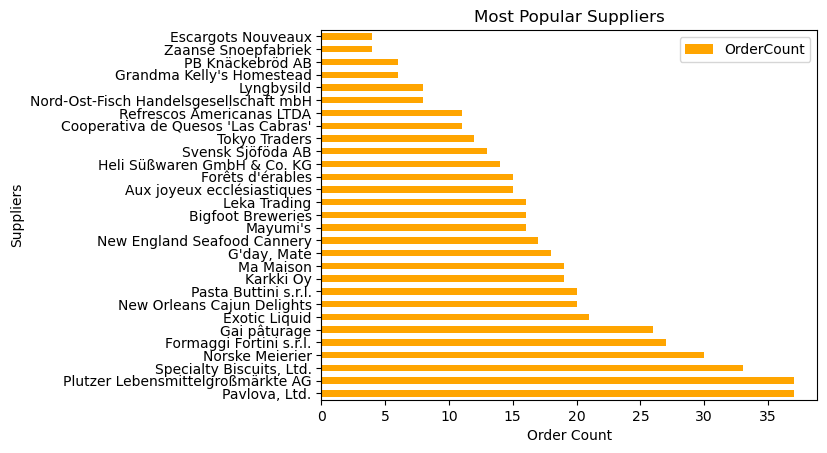

In [287]:
# TODO: Generate a visualization on this dataframe

pop_sup_df.plot.barh(x= "SupplierName", y="OrderCount", color = "orange")
plt.title("Most Popular Suppliers")
plt.xlabel('Order Count')
plt.ylabel('Suppliers')
plt.show()

## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

* USA has the greatest number of customers. It leads will 13 customers. The next two highest countries with 11 customers are Germany and France. The countries with the greatest numbers of suppliers is also USA with 4 suppliers, and Germany and France with 3 suppliers. Therefore it seems like more customers lead to more suppliers.

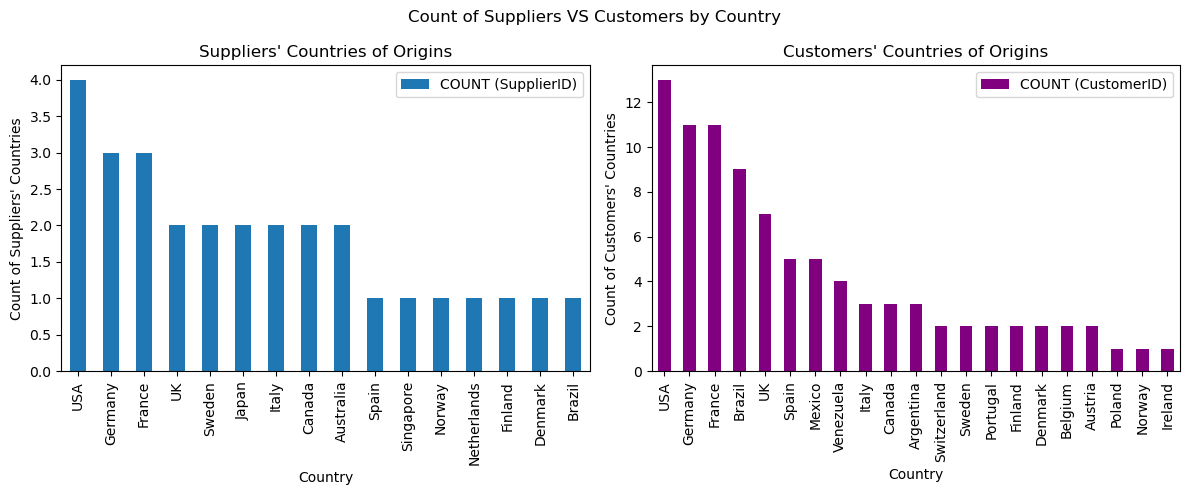

In [321]:
# Create figure and axes to show "Count of Suppliers VS Customers by Country"
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

country_count_df.plot.bar(x= "Country",ax=axes[0], ylabel = "Count of Suppliers' Countries",
title = "Suppliers' Countries of Origins")
plt.xlabel('Country')


cust_country_df.plot.bar(x= "Country",ax=axes[1], color= "purple")
plt.title("Customers' Countries of Origins")
plt.xlabel('Country')
plt.ylabel("Count of Customers' Countries")
fig.suptitle("Count of Suppliers VS Customers by Country")
plt.tight_layout()
plt.show()


### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

* The least popular product by order quantity is the Laughing Lumberjack Lager. It has 5 orders. Next is Røgede sild with 15 quantity orders. The less popular products quantity has less revenue. The Laughing Lumberjack Lager only had $70 in revenue and Røgede sild had the next lowest total revenue with $142.50

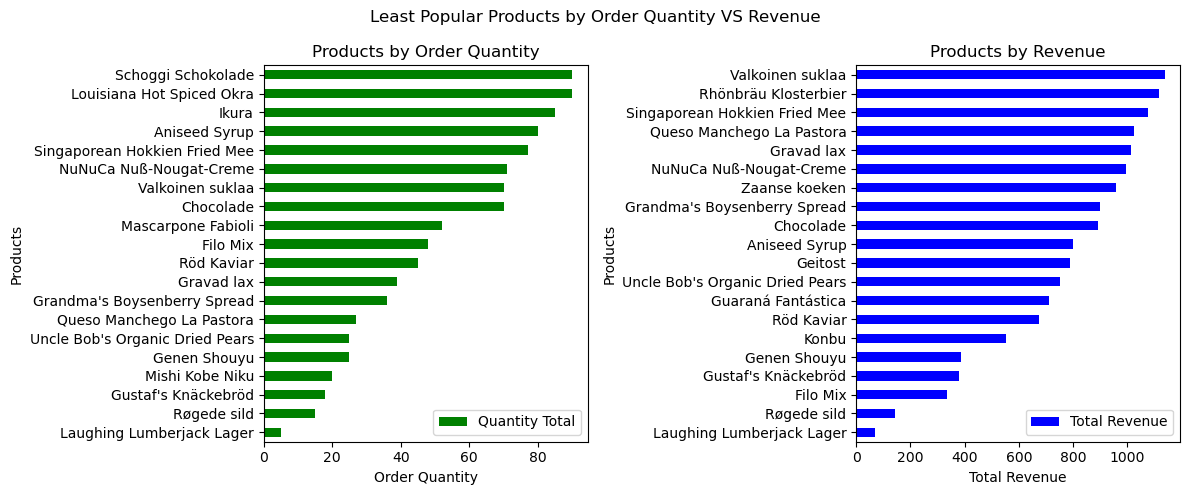

In [ ]:
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

prod_quant_df.plot.barh(x= "ProductName", y= "Quantity Total", 
    color = "green", ax=axes[0], title = "Products by Order Quantity",
    xlabel = "Order Quantity", ylabel ='Products')

total_rev_df.plot.barh(x= "ProductName", y= "Total Revenue", 
    color = "blue", ax=axes[1], title = "Products by Revenue",
    xlabel = "Total Revenue", ylabel = 'Products')

fig.suptitle("Least Popular Products by Order Quantity VS Revenue")
plt.tight_layout()
plt.show()


### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

* The USA has the most orders with 29 orders. The country with the most customers with no orders is USA with 5. The countries with more ordering customers have more non-ordering customers. Germany and France also have high order counts with Germany having 25 and France having 18. France has 4 customers with no orders and Germany has 2.

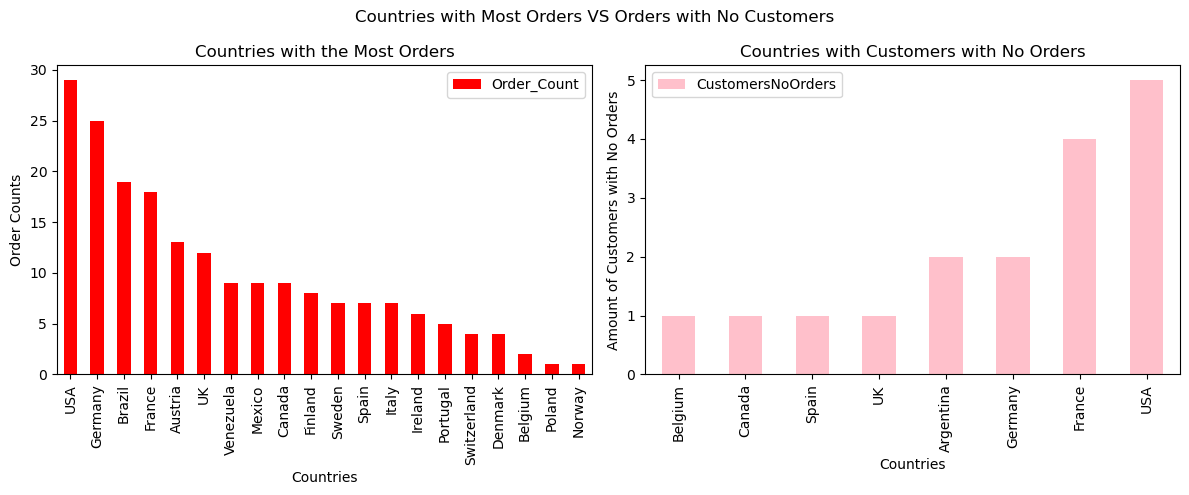

In [361]:
# Create figure and axes to show Countries with Most Orders VS Orders with No Customers"
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
orders_country_df.plot.bar(x= "Country", y="Order_Count", 
    color = "red", ax=axes[0], title = "Countries with the Most Orders",
    xlabel = "Countries", ylabel ='Order Counts')

no_orders_country_df.plot.bar(x= "Country", y="CustomersNoOrders", 
    color = "pink", ax=axes[1], title = "Countries with Customers with No Orders",
    xlabel = 'Countries', ylabel = 'Amount of Customers with No Orders')

fig.suptitle("Countries with Most Orders VS Orders with No Customers")
plt.tight_layout()
plt.show()

### Question 4

Which supplier has the most orders? Which evidence supports your answer?

* Pavlolva, Ltd. and Plutzer Lebensmittelgroßmärkte AG have the most orders with 37 orders. 

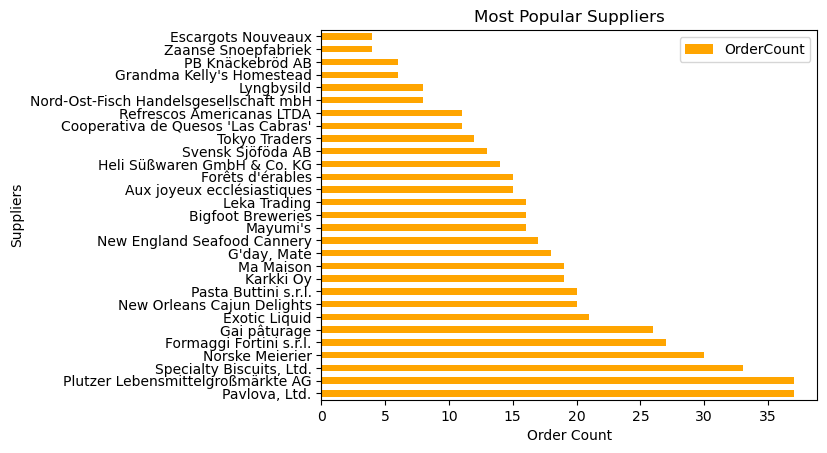

In [362]:
pop_sup_df.plot.barh(x= "SupplierName", y="OrderCount", color = "orange")
plt.title("Most Popular Suppliers")
plt.xlabel('Order Count')
plt.ylabel('Suppliers')
plt.show()